<a href="https://colab.research.google.com/github/shounakd56/Image-Caption-Generation-using-Deep-Learning/blob/main/Week%203/WiDS_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Captioning using Deep Learning: Assignment-3

*  In this assignment, we will use CNNs in [PyTorch](https://pytorch.org/docs/stable/index.html) for image classification.

* We have been using MNIST by flattening 28$\times$28 images to 784-sized vectors.

* This time, we will classify images from the CIFAR-10 dataset - dimension is 32$\times$32.

* Much of this notebook remains the same as for Assignment 2, just minor changes would be needed and this assignment won't take long.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Note the following method to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch (CPU/CUDA).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import random

import torch
import torch.nn as nn
import torch.nn.functional as F
device='cpu'
if torch.cuda.is_available():
    device=torch.device("cuda")

In [ ]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    # np.random.seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # # When running on the CuDNN backend, two further options must be set
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False
    # # Set a fixed value for the hash seed
    # os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed(42)

## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [ ]:
import torchvision
from torchvision import transforms, datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_path = './'

train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


# Your Code from here...

In [ ]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(train, [45000,5000])

from torch.utils.data import DataLoader
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

In [ ]:
# load the data set


X =  torch.utils.data.DataLoader(train, batch_size=1000, shuffle=True)
y = torch.utils.data.DataLoader(test, batch_size=1000, shuffle=True)

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library



In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
dataiter2 = iter(val_loader)
images_val, labels_val = next(dataiter2)

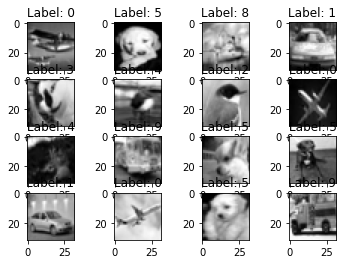

In [ ]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
for i in range(16):
     plt.subplot(4,4,i+1)
     plt.imshow(images[i][0], cmap='gray')
     plt.title('Label: {}'.format(labels[i]))
plt.show()

## Creating a Dataset Class


In [ ]:
# define your dataset class






## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers beyond those you used in the second assignment and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Conv2d```](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [```nn.BatchNorm2d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)


In [ ]:
# define a child class of nn.Module for your model
# specify the architecture here itself
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=torch.nn.Conv2d(3,8,3,padding='same') # 8,32,32
        self.bn2 = torch.nn.BatchNorm2d(8)
        self.pool3 = torch.nn.MaxPool2d(2,2) # 8,16,16
        self.conv4 = torch.nn.Conv2d(8,16,3,padding=1) # 16,16,16
        self.bn5 = torch.nn.BatchNorm2d(16)
        self.conv6 = torch.nn.Conv2d(16,16,3,padding=1) # 16,16,16
        self.bn7 = torch.nn.BatchNorm2d(16)
        self.pool8 = torch.nn.MaxPool2d(2,2) # 16,8,8
        self.conv9 = torch.nn.Conv2d(16,16,3,padding=1) # 16,8,8
        self.bn10 = torch.nn.BatchNorm2d(16)
        self.pool11 = torch.nn.MaxPool2d(2,2) # 16,4,4
        self.conv12 = torch.nn.Conv2d(16,32,3,padding=1) # 32,4,4
        self.bn13 = torch.nn.BatchNorm2d(32)
        self.conv14 = torch.nn.Conv2d(32,32,3,padding=1) # 32,4,4
        self.bn15 = torch.nn.BatchNorm2d(32)
        self.pool16 = torch.nn.AvgPool2d(4,4) # 32,1,1
        # 32,1
        self.fc17 = torch.nn.Linear(32,32) # 16,32
        self.bn18 = torch.nn.BatchNorm1d(32)
        self.fc19 = torch.nn.Linear(32,16) # 16,16
        self.bn20 = torch.nn.BatchNorm1d(16)
        self.fc21 = torch.nn.Linear(16,10)
        self.relu = torch.nn.ReLU()
    def forward(self,x):
        x.to(device)
        out = self.relu(self.bn2(self.conv1(x)))
        out = self.pool3(out)
        out = self.relu(self.bn5(self.conv4(out)))
        out = self.relu(self.bn7(self.conv6(out)))
        out = self.pool8(out)
        out = self.relu(self.bn10(self.conv9(out)))
        out = self.pool11(out)
        out = self.relu(self.bn13(self.conv12(out)))
        out = self.relu(self.bn15(self.conv14(out)))
        out = self.pool16(out)
        out = torch.reshape(out,(-1,32))
        out = self.relu(self.bn18(self.fc17(out)))
        out = self.relu(self.bn20(self.fc19(out)))
        out = self.fc21(out)
        out = torch.nn.functional.log_softmax(out,dim=1)
        return out


## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [ ]:
def train(model, optimizer, criterion, train_loader, display_step=None):
   #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    loss_vals=[]
    epoch_counter=[]
    for epoch in range(5):    
        loss=0
        for images,labels in train_loader:
            # images.to(device)
            images,labels = torch.autograd.Variable(images).to(device),labels.to(device)
            # labels.to(device)
            labels = torch.reshape(labels,(-1,))
            outputs = model.forward(images)
            loss = criterion(outputs,labels)
            loss.to(device)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if display_step:
                if((i)%display_step==100):
                    print(f'epoch {epoch+1},loss = {loss.item()}')
            
        epoch_counter.append(epoch)
        loss_vals.append(loss.item())
    return epoch_counter,loss_vals
        

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [ ]:
def predict(model, X_test):
    model.to('cpu')
    test_tensor = torch.from_numpy(X_test)
    preds=model(test_tensor)
    _,predicted = torch.max(preds.data, 1)
    return predicted

In [ ]:
def accuracy(pred, labels):
  acc=np.sum(np.equal(pred,labels))/len(labels)
  print(acc)

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [ ]:
model=Model()
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0005)


In [ ]:
train(model,optimizer,criterion,train_loader,display_step=500)

([0, 1, 2, 3, 4],
 [1.6003220081329346,
  0.8743641376495361,
  1.299472689628601,
  1.1622340679168701,
  1.3449984788894653])

## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [ ]:
images_valarr=images_val.numpy()

In [ ]:
prediction=predict(model,images_valarr)

In [ ]:
prediction=prediction.numpy()

In [ ]:
labels_valarr=labels_val.numpy()

In [ ]:
accuracy(prediction,labels_valarr)

0.671875


## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_3.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_3.pt``` model-weights file to the repository.

In [ ]:
from google.colab import files
torch.save(model, 'ass_3.pt')
files.download('ass_3.pt') # download the file from the Colab session for submission

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Check if it got saved right!

In [ ]:
# load the model, use predict function
